In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
airline = pd.read_csv('/mnt/c/Users/Ashwin/Documents/Ash/Projects/airline-passenger-traffic.csv',header=None)
airline.head()

,0,1
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [ ]:
airline.columns = ['Month','Passengers']
airline.head()

,Month,Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [ ]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       144 non-null    object 
 1   Passengers  140 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
airline['Month'] = pd.to_datetime(airline['Month'], format = '%Y-%m' )
print(airline.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  140 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB
None


In [ ]:
airline.head()

,Month,Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [ ]:
px.line(airline,x='Month',y='Passengers',template='ggplot2')

In [ ]:
airline['Passenger_Mean_Imputation'] = airline['Passengers'].fillna(airline['Passengers'].mean())
airline.head()

,Month,Passengers,Passenger_Mean_Imputation
0,1949-01-01,112.0,112.0
1,1949-02-01,118.0,118.0
2,1949-03-01,132.0,132.0
3,1949-04-01,129.0,129.0
4,1949-05-01,121.0,121.0


In [ ]:
airline.isnull().sum()

Month                        0
Passengers                   4
Passenger_Mean_Imputation    0
dtype: int64

In [ ]:
px.line(airline,x='Month',y='Passenger_Mean_Imputation',template='ggplot2')

In [ ]:
airline['passenger-linear_interpolate'] = airline['Passengers'].fillna(airline['Passengers'].interpolate(method='linear'))
airline.head()

,Month,Passengers,Passenger_Mean_Imputation,passenger-linear_interpolate
0,1949-01-01,112.0,112.0,112.0
1,1949-02-01,118.0,118.0,118.0
2,1949-03-01,132.0,132.0,132.0
3,1949-04-01,129.0,129.0,129.0
4,1949-05-01,121.0,121.0,121.0


In [ ]:
airline.isnull().sum()

Month                           0
Passengers                      4
Passenger_Mean_Imputation       0
passenger-linear_interpolate    0
dtype: int64

In [ ]:
px.line(airline,x='Month',y='passenger-linear_interpolate',template='ggplot2')

In [ ]:
px.box(airline,x='passenger-linear_interpolate',template='ggplot2')

In [ ]:
px.histogram(airline,x='passenger-linear_interpolate',template='ggplot2')

In [ ]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Month                         144 non-null    datetime64[ns]
 1   Passengers                    140 non-null    float64       
 2   Passenger_Mean_Imputation     144 non-null    float64       
 3   passenger-linear_interpolate  144 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 4.6 KB


In [ ]:
airline.set_index('Month',inplace=True)
airline.head()

,Passengers,Passenger_Mean_Imputation,passenger-linear_interpolate
Month,,,
1949-01-01,112.0,112.0,112.0
1949-02-01,118.0,118.0,118.0
1949-03-01,132.0,132.0,132.0
1949-04-01,129.0,129.0,129.0
1949-05-01,121.0,121.0,121.0


Additive and Multiplicative Decomposition

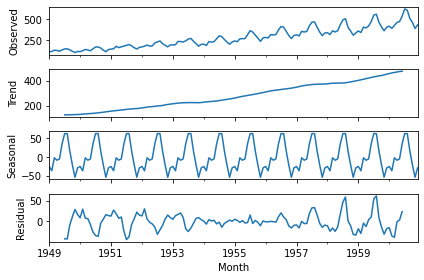

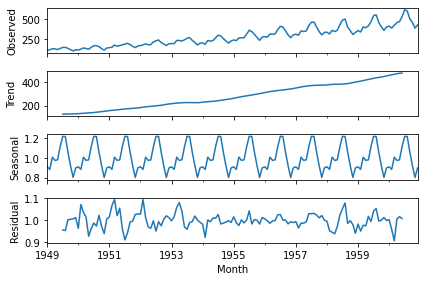

In [ ]:
import statsmodels.api as sm
decomp_type = ['additve','multiplicative']
for i in decomp_type:
  decomp = sm.tsa.seasonal_decompose(airline['passenger-linear_interpolate'],model= i )
  fig = decomp.plot()
  fig.show()

In [ ]:
df = pd.DataFrame(airline,columns=['Month','passenger-linear_interpolate'])

In [ ]:
df.drop('Month',axis=1,inplace=True)

In [ ]:
train_len = 120
train_set = df[:train_len]
test_set = df[train_len:]

In [ ]:
print(train_set.shape)
print(test_set.shape)

(120, 1)
(24, 1)


In [ ]:
train_set.head()

,passenger-linear_interpolate
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [ ]:
test_set.head()

,passenger-linear_interpolate
Month,
1959-01-01,360.0
1959-02-01,342.0
1959-03-01,406.0
1959-04-01,396.0
1959-05-01,420.0


###Naive Forecast & Average Forecasting

In [ ]:
train_set['passenger-linear_interpolate'][-1]

337.0

In [ ]:
forecast = test_set.copy()
forecast['Naive_Forecast'] = train_set['passenger-linear_interpolate'][-1]

In [ ]:
forecast['Average_Forecasting'] = train_set['passenger-linear_interpolate'].mean()

In [ ]:
forecast.head()

,passenger-linear_interpolate,Naive_Forecast,Average_Forecasting
Month,,,
1959-01-01,360.0,337.0,245.891667
1959-02-01,342.0,337.0,245.891667
1959-03-01,406.0,337.0,245.891667
1959-04-01,396.0,337.0,245.891667
1959-05-01,420.0,337.0,245.891667


In [ ]:
forecast.index

DatetimeIndex(['1959-01-01', '1959-02-01', '1959-03-01', '1959-04-01',
               '1959-05-01', '1959-06-01', '1959-07-01', '1959-08-01',
               '1959-09-01', '1959-10-01', '1959-11-01', '1959-12-01',
               '1960-01-01', '1960-02-01', '1960-03-01', '1960-04-01',
               '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01',
               '1960-09-01', '1960-10-01', '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [ ]:
fig = px.line(train_set,x=train_set.index,y=train_set['passenger-linear_interpolate'],template='ggplot2',labels={'passenger-linear_interpolate':'Passenger Count'})
fig.add_scatter(x=forecast.index,y=forecast['Naive_Forecast'],mode='lines',name='Naive_Forecast')
fig.add_scatter(x=forecast.index,y=forecast['Average_Forecasting'],mode='lines',name='Average_Forecasting')
fig.add_scatter(x=forecast.index,y=forecast['passenger-linear_interpolate'],mode='lines',name='Y_actual')
fig.show()

### Calculating Forecasting errors:
1. Mean Absolute Error = 1/n Σ(i=1,n) |Yi - Ŷ|

2. Root Mean Squared Error = √ 1/n Σ(i=1,n) (Yi - Ŷ)^2

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

naive_mape = mean_absolute_percentage_error(forecast['passenger-linear_interpolate'],forecast['Naive_Forecast'])*100
naive_rmse = np.sqrt(mean_squared_error(forecast['passenger-linear_interpolate'],forecast['Naive_Forecast']))
average_mape = mean_absolute_percentage_error(forecast['passenger-linear_interpolate'],forecast['Average_Forecasting'])*100
average_rmse = np.sqrt(mean_squared_error(forecast['passenger-linear_interpolate'],forecast['Average_Forecasting']))

In [ ]:
print(naive_mape)
print(naive_rmse)
print(average_mape)
print(average_rmse)

23.632534624153948
137.51045414803923
44.27856575556158
219.68948714922362


In [ ]:
error = np.array([[naive_mape.round(2),naive_rmse.round(2)],[average_mape.round(2),average_rmse.round(2)]])
error

array([[ 23.63, 137.51],
       [ 44.28, 219.69]])

In [ ]:
errors = pd.DataFrame(error,columns=['Mean_absolute_percentage_error','Root_Mean_Squared_Error'],index=['Naive Forcasting','Average Forecasting'])

In [ ]:
errors.head()

,Mean_absolute_percentage_error,Root_Mean_Squared_Error
Naive Forcasting,23.63,137.51
Average Forecasting,44.28,219.69


In [ ]:
moving_average = airline.copy()

In [ ]:
moving_average.drop(['Passenger_Mean_Imputation','Passengers'],axis=1,inplace=True)

In [ ]:
moving_average.rename({'passenger-linear_interpolate':'passengers'},axis=1,inplace=True)

In [ ]:
moving_average.head()

,passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [ ]:
moving_average['moving_average_forecast'] =  moving_average['passengers'].rolling(12).mean()
moving_average.head()

,passengers,moving_average_forecast
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,NaN
1949-03-01,132.0,NaN
1949-04-01,129.0,NaN
1949-05-01,121.0,NaN


In [ ]:
fig2 = px.line(moving_average,x=moving_average.index,y='passengers',template='ggplot2')
fig2.add_scatter(x=moving_average.index,y=moving_average['moving_average_forecast'],mode='lines',name='12 month rolling average')
fig2.show()

In [ ]:
forecast['Simple_Moving_Average'] = moving_average['moving_average_forecast'][train_len:]
forecast.head()

,passenger-linear_interpolate,Naive_Forecast,Average_Forecasting,Simple_Moving_Average
Month,,,,
1959-01-01,360.0,337.0,245.891667,382.666667
1959-02-01,342.0,337.0,245.891667,384.666667
1959-03-01,406.0,337.0,245.891667,388.333333
1959-04-01,396.0,337.0,245.891667,392.333333
1959-05-01,420.0,337.0,245.891667,397.083333


In [ ]:
MA_mape = mean_absolute_percentage_error(forecast['passenger-linear_interpolate'],forecast['Simple_Moving_Average'])*100
MA_rmse = np.sqrt(mean_squared_error(forecast['passenger-linear_interpolate'],forecast['Simple_Moving_Average']))

In [ ]:
error_MA = np.array([[MA_mape.round(2),MA_rmse.round(2)]])


In [ ]:
sma = pd.DataFrame(error_MA,columns=['Mean_absolute_percentage_error','Root_Mean_Squared_Error'],index=['Simple_Moving_Average'])

In [ ]:
sma.head()

,Mean_absolute_percentage_error,Root_Mean_Squared_Error
Simple_Moving_Average,11.16,72.23


In [ ]:
models = pd.concat([sma,errors])

In [ ]:
models

,Mean_absolute_percentage_error,Root_Mean_Squared_Error
Simple_Moving_Average,11.16,72.23
Naive Forcasting,23.63,137.51
Average Forecasting,44.28,219.69


In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
tsa_model = SimpleExpSmoothing(train_set['passenger-linear_interpolate'])
model_fit = tsa_model.fit(smoothing_level =0.2,optimized=False)
model_fit.params
y_hat = test_set.copy()
y_hat['ses_forecast'] = model_fit.forecast(24)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [ ]:
ses = px.line(train_set,x=train_set.index,y=['passenger-linear_interpolate'],template='ggplot2',labels={'value':'Passengers'})
ses.add_scatter(x=y_hat.index,y=y_hat['passenger-linear_interpolate'],mode='lines',name='Y_actual')
ses.add_scatter(x=y_hat.index,y=y_hat['ses_forecast'],mode = 'lines',name = 'SES_Forecast')
ses.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y_hat['passenger-linear_interpolate'],y_hat['ses_forecast']))
mape = mean_absolute_percentage_error(y_hat['passenger-linear_interpolate'],y_hat['ses_forecast'])

In [ ]:
ses_error = np.array([[mape.round(2),rmse.round(2)]])
ses_df = pd.DataFrame(ses_error,columns=['Mean_absolute_percentage_error','Root_Mean_Squared_Error'],index=['SES_Forecast'])

model_comparision = pd.concat([ses_df,models])

In [ ]:
model_comparision.head()

,Mean_absolute_percentage_error,Root_Mean_Squared_Error
SES_Forecast,0.16,107.65
Simple_Moving_Average,11.16,72.23
Naive Forcasting,23.63,137.51
Average Forecasting,44.28,219.69


###Holts Exponential Smoothing

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hes_model = ExponentialSmoothing(np.asarray(train_set['passenger-linear_interpolate']),seasonal_periods=12,trend='additive',seasonal=None)
model_fit = hes_model.fit(smoothing_level = 0.2,smoothing_slope = 0.01 ,optimized=True)
model_fit.params
y_hat_hes = test_set.copy()
y_hat_hes['Holts_Exponential_Forecast'] = model_fit.forecast(24)

In [ ]:
hes = px.line(train_set,x = train_set.index,y='passenger-linear_interpolate',template='ggplot2')
hes.add_scatter(x=y_hat_hes.index,y=y_hat_hes['passenger-linear_interpolate'],mode='lines',name='Y-actual')
hes.add_scatter(x=y_hat_hes.index,y=y_hat_hes['Holts_Exponential_Forecast'],mode='lines',name='HES - Forecast')
hes.show()

In [ ]:
rmse_hes = np.sqrt(mean_squared_error(y_hat_hes['passenger-linear_interpolate'],y_hat_hes['Holts_Exponential_Forecast']))
mape_hes =  mean_absolute_percentage_error(y_hat_hes['passenger-linear_interpolate'],y_hat_hes['Holts_Exponential_Forecast'])

In [ ]:
hes = np.array([[mape_hes.round(2),rmse_hes.round(2)]])

In [ ]:
hes_error = pd.DataFrame(hes,columns=['Mean_absolute_percentage_error','Root_Mean_Squared_Error'],index=['HES_Forecast'])
model_comparision = pd.concat([hes_error,model_comparision])

In [ ]:
model_comparision.head()

,Mean_absolute_percentage_error,Root_Mean_Squared_Error
HES_Forecast,0.11,80.40
SES_Forecast,0.16,107.65
Simple_Moving_Average,11.16,72.23
Naive Forcasting,23.63,137.51
Average Forecasting,44.28,219.69


Holt Winters ADDITIVE & MULTIPLICATIVE Method

In [ ]:
hwa = ExponentialSmoothing(np.asarray(train_set['passenger-linear_interpolate']),seasonal_periods=12,trend='additive',seasonal='additive')
hwm = ExponentialSmoothing(np.asarray(train_set['passenger-linear_interpolate']),seasonal_periods=12,trend='additive',seasonal='multiplicative')


hwa_model_fit = hwa.fit(optimized=True)
hwm_model_fit = hwm.fit(optimized=True)



print(hwa_model_fit.params)
print(hwm_model_fit.params)


y_hat_holt_winter = test_set.copy()


y_hat_holt_winter['Holts_Winters_Additve_Forecast'] = hwa_model_fit.forecast(24)
y_hat_holt_winter['Holts_Winters_Multiplicative_Forecast'] = hwm_model_fit.forecast(24)

{'smoothing_level': 0.26315789314098276, 'smoothing_slope': 0.051629645024921914, 'smoothing_seasonal': 0.7368421036672985, 'damping_slope': nan, 'initial_level': 211.5509857554829, 'initial_slope': 1.7392015465813395, 'initial_seasons': array([-100.18118104,  -94.20464473,  -80.29175401,  -83.41758391,
        -91.45908167,  -77.45094418,  -64.48324484,  -64.57340828,
        -76.66644581,  -93.73584652, -108.67611385,  -94.50947874]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
{'smoothing_level': 0.38484064840698556, 'smoothing_slope': 0.035386453247783, 'smoothing_seasonal': 0.6151593186319729, 'damping_slope': nan, 'initial_level': 212.39830870038878, 'initial_slope': 1.1057967107993691, 'initial_seasons': array([0.51755725, 0.54595018, 0.60261532, 0.56966257, 0.52017629,
       0.5722879 , 0.62749981, 0.62520353, 0.56963344, 0.49468435,
       0.43937027, 0.51362925]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [ ]:
holt_winter = px.line(train_set,x = train_set.index,y='passenger-linear_interpolate',template='ggplot2')
holt_winter.add_scatter(x=y_hat_holt_winter.index,y=y_hat_holt_winter['passenger-linear_interpolate'],mode='lines',name='Y-actual')
holt_winter.add_scatter(x=y_hat_holt_winter.index,y=y_hat_holt_winter['Holts_Winters_Additve_Forecast'],mode='lines',name='HWA - Forecast')
holt_winter.add_scatter(x=y_hat_holt_winter.index,y=y_hat_holt_winter['Holts_Winters_Multiplicative_Forecast'],mode='lines',name='HWM - Forecast')
holt_winter.show()

In [ ]:
rmse_hwa = np.sqrt(mean_squared_error(y_hat_holt_winter['passenger-linear_interpolate'],y_hat_holt_winter['Holts_Winters_Additve_Forecast']))
mape_hwa =  mean_absolute_percentage_error(y_hat_holt_winter['passenger-linear_interpolate'],y_hat_holt_winter['Holts_Winters_Additve_Forecast'])

rmse_hwm = np.sqrt(mean_squared_error(y_hat_holt_winter['passenger-linear_interpolate'],y_hat_holt_winter['Holts_Winters_Multiplicative_Forecast']))
mape_hwm =  mean_absolute_percentage_error(y_hat_holt_winter['passenger-linear_interpolate'],y_hat_holt_winter['Holts_Winters_Multiplicative_Forecast'])

In [ ]:
hw = np.array([[mape_hwa.round(2),rmse_hwa.round(2)],[rmse_hwm.round(2),mape_hwm.round(2)]])
hw

array([[ 0.07, 35.1 ],
       [34.83,  0.07]])

In [ ]:
hw_error = pd.DataFrame(hw,columns=['Mean_absolute_percentage_error','Root_Mean_Squared_Error'],index=['HWA_Forecast','HWM_Forecast'])
model_comparision2 = pd.concat([hw_error,model_comparision])
model_comparision2.head()

,Mean_absolute_percentage_error,Root_Mean_Squared_Error
HWA_Forecast,0.07,35.10
HWM_Forecast,34.83,0.07
HES_Forecast,0.11,80.40
SES_Forecast,0.16,107.65
Simple_Moving_Average,11.16,72.23
